# 2 - Practice Problems & Real-World Applications

**Goal:** Apply descriptive statistics to real-world scenarios

- Understand when to use which metric
- Extract business insights from data
- Compare datasets like a professional analyst

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

sns.set_style("whitegrid")
print("✓ All libraries loaded successfully!")

✓ All libraries loaded successfully!


---

## PROBLEM SET 1: Basic Calculations with Heights Data

**Dataset:** Heights (cm) of 12 students

`[165, 172, 168, 171, 169, 174, 166, 170, 173, 167, 169, 171]`

In [3]:
# Create the heights dataset
heights = [165, 172, 168, 171, 169, 174, 166, 170, 173, 167, 169, 171]
heights_series = pd.Series(heights)

print("Heights (cm):", heights)
print(f"Number of students: {len(heights)}")
print(f"Sorted: {sorted(heights)}")

Heights (cm): [165, 172, 168, 171, 169, 174, 166, 170, 173, 167, 169, 171]
Number of students: 12
Sorted: [165, 166, 167, 168, 169, 169, 170, 171, 171, 172, 173, 174]


### Problem 1.1: Calculate Mean Height

**Question:** What's the average height of these students?

In [4]:
# Solution
mean_height = heights_series.mean()

print(f"Mean height: {mean_height:.2f} cm")
print(f"\nManual calculation: {sum(heights)} / {len(heights)} = {sum(heights)/len(heights):.2f} cm")
print(f"\nInterpretation: On average, students are {mean_height:.1f} cm tall")

Mean height: 169.58 cm

Manual calculation: 2035 / 12 = 169.58 cm

Interpretation: On average, students are 169.6 cm tall


### Problem 1.2: Calculate Median Height

**Question:** What's the middle height when students are lined up by height?

In [5]:
# Solution
median_height = heights_series.median()
sorted_heights = sorted(heights)

print(f"Sorted heights: {sorted_heights}")
print(f"\nMiddle two values (6th and 7th): {sorted_heights[5]} and {sorted_heights[6]}")
print(f"Median = ({sorted_heights[5]} + {sorted_heights[6]}) / 2 = {median_height:.1f} cm")
print(f"\nInterpretation: Half the students are below {median_height:.1f} cm, half are above")

Sorted heights: [165, 166, 167, 168, 169, 169, 170, 171, 171, 172, 173, 174]

Middle two values (6th and 7th): 169 and 170
Median = (169 + 170) / 2 = 169.5 cm

Interpretation: Half the students are below 169.5 cm, half are above


### Problem 1.3: Find the Mode

**Question:** Which height appears most frequently?

In [9]:
# Solution
mode_height = heights_series.mode()

print("Height frequency:")
print(heights_series.value_counts().sort_index())
print(f"\nModes (most frequent heights): {mode_height.tolist()}")
print(f"\nInterpretation: Both {mode_height[0]} cm and {mode_height[1]} cm appear twice")
print("This is called BIMODAL distribution (two modes)")

Height frequency:
165    1
166    1
167    1
168    1
169    2
170    1
171    2
172    1
173    1
174    1
Name: count, dtype: int64

Modes (most frequent heights): [169, 171]

Interpretation: Both 169 cm and 171 cm appear twice
This is called BIMODAL distribution (two modes)


### Problem 1.4: Calculate Range

**Question:** What's the spread between shortest and tallest?

In [10]:
# Solution
min_height = heights_series.min()
max_height = heights_series.max()
range_height = max_height - min_height

print(f"Minimum height: {min_height} cm")
print(f"Maximum height: {max_height} cm")
print(f"Range: {max_height} - {min_height} = {range_height} cm")
print(f"\nInterpretation: Heights vary by {range_height} cm")
print("This is a small range, so heights are fairly consistent")

Minimum height: 165 cm
Maximum height: 174 cm
Range: 174 - 165 = 9 cm

Interpretation: Heights vary by 9 cm
This is a small range, so heights are fairly consistent


### Problem 1.5: Calculate Standard Deviation

**Question:** How much do heights typically vary from the average?

In [11]:
# Solution
std_height = heights_series.std()
var_height = heights_series.var()

print(f"Variance: {var_height:.2f}")
print(f"Standard Deviation: {std_height:.2f} cm")
print(f"\nInterpretation:")
print(f"- On average, heights deviate from mean ({mean_height:.1f} cm) by {std_height:.1f} cm")
print(f"- Range from {mean_height - std_height:.1f} cm to {mean_height + std_height:.1f} cm covers ~68% of students")
print(f"\nThis is a SMALL std dev, so heights are very consistent")

Variance: 7.72
Standard Deviation: 2.78 cm

Interpretation:
- On average, heights deviate from mean (169.6 cm) by 2.8 cm
- Range from 166.8 cm to 172.4 cm covers ~68% of students

This is a SMALL std dev, so heights are very consistent


### Problem 1.6: Find Quartiles (Q1, Q2, Q3)

**Question:** If you divide students into 4 groups by height, where are the boundaries?

In [12]:
# Solution
Q1 = heights_series.quantile(0.25)
Q2 = heights_series.quantile(0.50)  # Same as median
Q3 = heights_series.quantile(0.75)

print(f"Q1 (25th percentile): {Q1:.1f} cm - 25% of students below this")
print(f"Q2 (50th percentile): {Q2:.1f} cm - This is the MEDIAN")
print(f"Q3 (75th percentile): {Q3:.1f} cm - 75% of students below this")
print(f"\nInterpretation:")
print(f"- Shortest 25% are below {Q1:.0f} cm")
print(f"- Middle 50% are between {Q1:.0f} and {Q3:.0f} cm")
print(f"- Tallest 25% are above {Q3:.0f} cm")

Q1 (25th percentile): 167.8 cm - 25% of students below this
Q2 (50th percentile): 169.5 cm - This is the MEDIAN
Q3 (75th percentile): 171.2 cm - 75% of students below this

Interpretation:
- Shortest 25% are below 168 cm
- Middle 50% are between 168 and 171 cm
- Tallest 25% are above 171 cm


### Problem 1.7: Calculate IQR (Interquartile Range)

**Question:** What's the spread of the middle 50% of heights?

In [13]:
# Solution
IQR = Q3 - Q1

print(f"IQR = Q3 - Q1 = {Q3:.1f} - {Q1:.1f} = {IQR:.1f} cm")
print(f"\nInterpretation:")
print(f"The middle 50% of heights span {IQR:.1f} cm")
print(f"This is a TIGHT spread, meaning most students have similar heights")

IQR = Q3 - Q1 = 171.2 - 167.8 = 3.5 cm

Interpretation:
The middle 50% of heights span 3.5 cm
This is a TIGHT spread, meaning most students have similar heights


### Problem 1.8: Detect Outliers Using IQR Method

**Question:** If we add an unusually short student (130 cm), is this an outlier?

In [14]:
# Solution
heights_with_outlier = [165, 172, 168, 171, 169, 174, 166, 170, 173, 167, 169, 171, 130]
hs = pd.Series(heights_with_outlier)

Q1_new = hs.quantile(0.25)
Q3_new = hs.quantile(0.75)
IQR_new = Q3_new - Q1_new

lower_bound = Q1_new - 1.5 * IQR_new
upper_bound = Q3_new + 1.5 * IQR_new

print(f"With outlier added:")
print(f"Q1: {Q1_new:.1f}, Q3: {Q3_new:.1f}, IQR: {IQR_new:.1f}")
print(f"\nOutlier thresholds:")
print(f"Lower bound: {Q1_new:.1f} - 1.5 × {IQR_new:.1f} = {lower_bound:.1f}")
print(f"Upper bound: {Q3_new:.1f} + 1.5 × {IQR_new:.1f} = {upper_bound:.1f}")
print(f"\nAny value below {lower_bound:.1f} or above {upper_bound:.1f} is an OUTLIER")

outliers = hs[(hs < lower_bound) | (hs > upper_bound)]
print(f"\nOutliers detected: {outliers.tolist()}")
print(f"\n✓ YES! 130 cm is an outlier (unusually short)")

With outlier added:
Q1: 167.0, Q3: 171.0, IQR: 4.0

Outlier thresholds:
Lower bound: 167.0 - 1.5 × 4.0 = 161.0
Upper bound: 171.0 + 1.5 × 4.0 = 177.0

Any value below 161.0 or above 177.0 is an OUTLIER

Outliers detected: [130]

✓ YES! 130 cm is an outlier (unusually short)


### Problem Set 1 Summary

All statistics for heights dataset:

In [15]:
print("\n" + "="*60)
print("PROBLEM SET 1 - COMPLETE SUMMARY")
print("="*60)
print(f"Mean:          {mean_height:.2f} cm")
print(f"Median:        {median_height:.2f} cm")
print(f"Mode:          {mode_height.tolist()}")
print(f"Range:         {range_height} cm")
print(f"Variance:      {var_height:.2f}")
print(f"Std Deviation: {std_height:.2f} cm")
print(f"Q1:            {Q1:.2f} cm")
print(f"Q3:            {Q3:.2f} cm")
print(f"IQR:           {IQR:.2f} cm")
print("="*60)
print("\nKey Insight: This group has very CONSISTENT heights")
print(f"(Low std dev of {std_height:.1f} cm means heights cluster together)")


PROBLEM SET 1 - COMPLETE SUMMARY
Mean:          169.58 cm
Median:        169.50 cm
Mode:          [169, 171]
Range:         9 cm
Variance:      7.72
Std Deviation: 2.78 cm
Q1:            167.75 cm
Q3:            171.25 cm
IQR:           3.50 cm

Key Insight: This group has very CONSISTENT heights
(Low std dev of 2.8 cm means heights cluster together)


---

## PROBLEM SET 2: Comparative Analysis

**Scenario:** Two classes took the same test. Which class performed better?

**Class A Scores:** `[75, 78, 82, 80, 76, 85, 81, 79, 77, 83]`
**Class B Scores:** `[45, 50, 95, 88, 52, 98, 100, 40, 60, 72]`

In [16]:
# Create datasets
class_a = pd.Series([75, 78, 82, 80, 76, 85, 81, 79, 77, 83])
class_b = pd.Series([45, 50, 95, 88, 52, 98, 100, 40, 60, 72])

print("Class A Scores:", class_a.tolist())
print("Class B Scores:", class_b.tolist())

Class A Scores: [75, 78, 82, 80, 76, 85, 81, 79, 77, 83]
Class B Scores: [45, 50, 95, 88, 52, 98, 100, 40, 60, 72]


### Problem 2.1: Which class has higher average?

In [17]:
mean_a = class_a.mean()
mean_b = class_b.mean()

print(f"Class A Mean: {mean_a:.1f}")
print(f"Class B Mean: {mean_b:.1f}")
print(f"\nDifference: {mean_a - mean_b:.1f} points")
print(f"\n✓ Class A has higher average (by {mean_a - mean_b:.1f} points)")

Class A Mean: 79.6
Class B Mean: 70.0

Difference: 9.6 points

✓ Class A has higher average (by 9.6 points)


### Problem 2.2: Which class has more consistent scores?

In [18]:
std_a = class_a.std()
std_b = class_b.std()

print(f"Class A Std Dev: {std_a:.2f}")
print(f"Class B Std Dev: {std_b:.2f}")
print(f"\nDifference: {std_b - std_a:.2f} points")
print(f"\nInterpretation:")
print(f"- Class A: Scores cluster tightly (std dev {std_a:.1f})")
print(f"  Most scores between {mean_a - std_a:.0f} and {mean_a + std_a:.0f}")
print(f"\n- Class B: Scores spread widely (std dev {std_b:.1f})")
print(f"  Some students got 40, others got 100!")
print(f"\n✓ Class A is MUCH more consistent")

Class A Std Dev: 3.20
Class B Std Dev: 23.54

Difference: 20.33 points

Interpretation:
- Class A: Scores cluster tightly (std dev 3.2)
  Most scores between 76 and 83

- Class B: Scores spread widely (std dev 23.5)
  Some students got 40, others got 100!

✓ Class A is MUCH more consistent


### Problem 2.3: Which class would you recommend?

In [19]:
# Create comparison
comparison = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Range'],
    'Class A': [
        f"{class_a.mean():.1f}",
        f"{class_a.median():.1f}",
        f"{class_a.std():.2f}",
        f"{class_a.min()}",
        f"{class_a.max()}",
        f"{class_a.max() - class_a.min()}"
    ],
    'Class B': [
        f"{class_b.mean():.1f}",
        f"{class_b.median():.1f}",
        f"{class_b.std():.2f}",
        f"{class_b.min()}",
        f"{class_b.max()}",
        f"{class_b.max() - class_b.min()}"
    ]
})

print(comparison.to_string(index=False))
print("\n" + "="*60)
print("VERDICT:")
print("="*60)
print("\n✓ Class A is BETTER because:")
print(f"  1. Higher average ({mean_a:.1f} vs {mean_b:.1f})")
print(f"  2. More consistent (std dev {std_a:.1f} vs {std_b:.1f})")
print(f"  3. Narrower range ({class_a.max() - class_a.min()} vs {class_b.max() - class_b.min()})")
print("\n✗ Class B problems:")
print(f"  - Some students completely failed (score 40)")
print(f"  - High variability indicates mixed teaching/understanding")
print(f"  - Unpredictable performance")
print("\nConclusion: Class A is more reliable and higher-performing!")

 Metric Class A Class B
   Mean    79.6    70.0
 Median    79.5    66.0
Std Dev    3.20   23.54
    Min      75      40
    Max      85     100
  Range      10      60

VERDICT:

✓ Class A is BETTER because:
  1. Higher average (79.6 vs 70.0)
  2. More consistent (std dev 3.2 vs 23.5)
  3. Narrower range (10 vs 60)

✗ Class B problems:
  - Some students completely failed (score 40)
  - High variability indicates mixed teaching/understanding
  - Unpredictable performance

Conclusion: Class A is more reliable and higher-performing!


### Visualization: Class Comparison

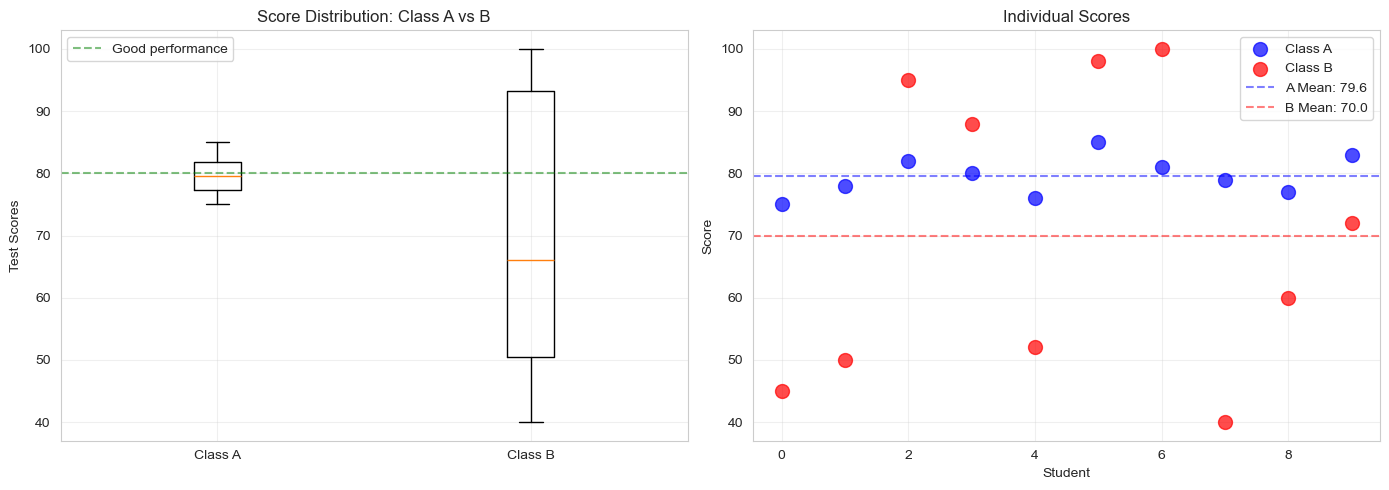

Chart saved as 'class_comparison.png'


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplots
data_to_plot = [class_a, class_b]
axes[0].boxplot(data_to_plot, tick_labels=['Class A', 'Class B'])
axes[0].set_ylabel('Test Scores')
axes[0].set_title('Score Distribution: Class A vs B')
axes[0].grid(alpha=0.3)
axes[0].axhline(y=80, color='green', linestyle='--', alpha=0.5, label='Good performance')
axes[0].legend()

# Scatter plots
axes[1].scatter(range(len(class_a)), class_a, s=100, alpha=0.7, label='Class A', color='blue')
axes[1].scatter(range(len(class_b)), class_b, s=100, alpha=0.7, label='Class B', color='red')
axes[1].axhline(y=mean_a, color='blue', linestyle='--', alpha=0.5, label=f'A Mean: {mean_a:.1f}')
axes[1].axhline(y=mean_b, color='red', linestyle='--', alpha=0.5, label=f'B Mean: {mean_b:.1f}')
axes[1].set_xlabel('Student')
axes[1].set_ylabel('Score')
axes[1].set_title('Individual Scores')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('class_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print("Chart saved as 'class_comparison.png'")

---

## PROBLEM SET 3: Real-World E-Commerce Data

**Scenario:** You're analyzing daily customer purchase amounts ($) for an e-commerce site.

**Question:** What can this data tell you about your customers?

In [22]:
purchases = pd.Series([45, 67, 89, 52, 73, 120, 91, 58, 150, 75, 64, 88, 42, 95, 200, 71, 84, 76, 60, 55])

print(f"Purchase amounts ($): {purchases.tolist()}")
print(f"Number of transactions: {len(purchases)}")
print(f"Date range: 20 days of sales")

Purchase amounts ($): [45, 67, 89, 52, 73, 120, 91, 58, 150, 75, 64, 88, 42, 95, 200, 71, 84, 76, 60, 55]
Number of transactions: 20
Date range: 20 days of sales


### Problem 3.1: Basic Summary Statistics

In [23]:
mean_purchase = purchases.mean()
median_purchase = purchases.median()
std_purchase = purchases.std()
min_purchase = purchases.min()
max_purchase = purchases.max()
IQR_purchase = purchases.quantile(0.75) - purchases.quantile(0.25)

print(f"Mean Purchase:        ${mean_purchase:.2f}")
print(f"Median Purchase:      ${median_purchase:.2f}")
print(f"Std Deviation:        ${std_purchase:.2f}")
print(f"Min:                  ${min_purchase}")
print(f"Max:                  ${max_purchase}")
print(f"Range:                ${max_purchase - min_purchase}")
print(f"IQR:                  ${IQR_purchase:.2f}")
print(f"\nQuick Summary:")
print(purchases.describe())

Mean Purchase:        $82.75
Median Purchase:      $74.00
Std Deviation:        $37.57
Min:                  $42
Max:                  $200
Range:                $158
IQR:                  $30.00

Quick Summary:
count     20.000000
mean      82.750000
std       37.566608
min       42.000000
25%       59.500000
50%       74.000000
75%       89.500000
max      200.000000
dtype: float64


### Problem 3.2: Detect Outliers

In [24]:
Q1_p = purchases.quantile(0.25)
Q3_p = purchases.quantile(0.75)
IQR_p = Q3_p - Q1_p

lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p

outliers_p = purchases[(purchases < lower_bound_p) | (purchases > upper_bound_p)]

print(f"Q1: ${Q1_p:.2f}")
print(f"Q3: ${Q3_p:.2f}")
print(f"IQR: ${IQR_p:.2f}")
print(f"\nOutlier thresholds:")
print(f"Lower: ${lower_bound_p:.2f}")
print(f"Upper: ${upper_bound_p:.2f}")
print(f"\nOutlier purchases: {outliers_p.tolist()}")
print(f"\nInterpretation:")
print(f"- Customers who spent $150 and $200 are UNUSUAL")
print(f"- They're 'big spenders' (high-value customers!)")

Q1: $59.50
Q3: $89.50
IQR: $30.00

Outlier thresholds:
Lower: $14.50
Upper: $134.50

Outlier purchases: [150, 200]

Interpretation:
- Customers who spent $150 and $200 are UNUSUAL
- They're 'big spenders' (high-value customers!)


### Problem 3.3: Business Insights from Skewness

In [25]:
skewness_p = stats.skew(purchases)

print(f"Mean:      ${mean_purchase:.2f}")
print(f"Median:    ${median_purchase:.2f}")
print(f"Skewness:  {skewness_p:.4f}")
print(f"\nAnalysis:")
print(f"Mean > Median (${mean_purchase:.2f} > ${median_purchase:.2f})")
print(f"This means the distribution is RIGHT-SKEWED (positive skew)")
print(f"\nWhat does this tell us?")
print(f"- Most customers spend around ${median_purchase:.0f}")
print(f"- But some big spenders (spending $150-200) pull the average UP")
print(f"- The outliers (150, 200) are on the RIGHT side")
print(f"\nBusiness Implications:")
print(f"1. Your 'typical' customer spends ${median_purchase:.0f}")
print(f"2. You have valuable 'whale' customers (spend 2-3x more)")
print(f"3. Focus retention efforts on those high-value customers!")

Mean:      $82.75
Median:    $74.00
Skewness:  1.7904

Analysis:
Mean > Median ($82.75 > $74.00)
This means the distribution is RIGHT-SKEWED (positive skew)

What does this tell us?
- Most customers spend around $74
- But some big spenders (spending $150-200) pull the average UP
- The outliers (150, 200) are on the RIGHT side

Business Implications:
1. Your 'typical' customer spends $74
2. You have valuable 'whale' customers (spend 2-3x more)
3. Focus retention efforts on those high-value customers!


### Visualization: Purchase Distribution

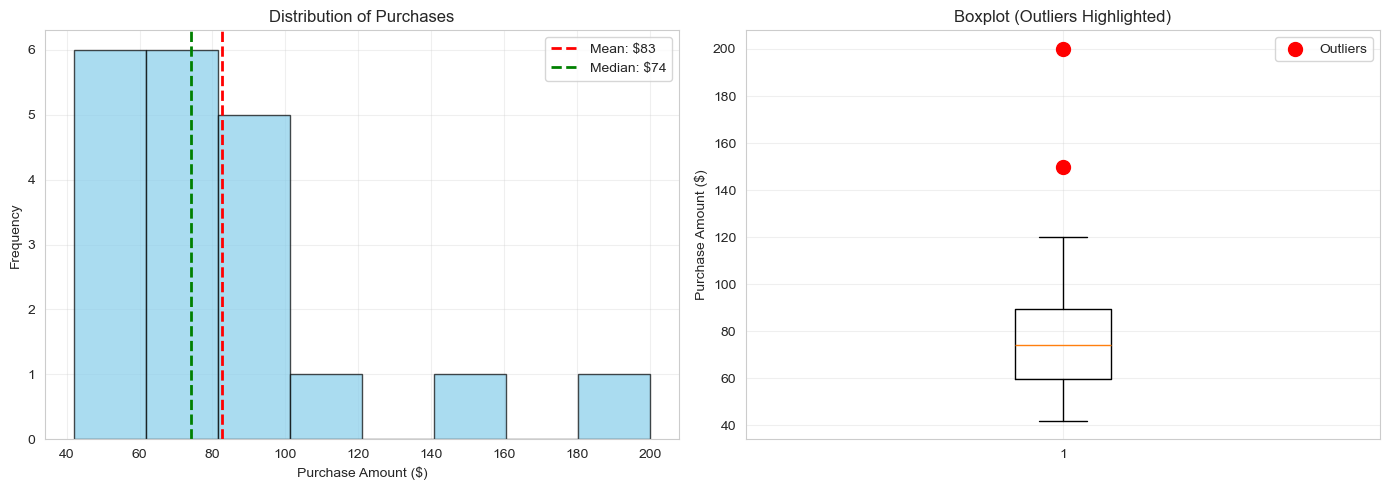

Chart saved as 'purchase_distribution.png'


In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(purchases, bins=8, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(mean_purchase, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_purchase:.0f}')
axes[0].axvline(median_purchase, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_purchase:.0f}')
axes[0].set_xlabel('Purchase Amount ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Purchases')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot with outliers highlighted
box = axes[1].boxplot(purchases, vert=True)
axes[1].scatter([1]*len(outliers_p), outliers_p, color='red', s=100, zorder=3, label='Outliers')
axes[1].set_ylabel('Purchase Amount ($)')
axes[1].set_title('Boxplot (Outliers Highlighted)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('purchase_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

print("Chart saved as 'purchase_distribution.png'")

---

## PROBLEM SET 4: Multiple Datasets Comparison

**Scenario:** A student took tests in 4 different subjects. Which subjects should they focus on?

In [27]:
# Create datasets for 4 subjects
math = pd.Series([92, 88, 95, 91, 89])
english = pd.Series([75, 78, 72, 76, 74])
science = pd.Series([88, 92, 85, 89, 90])
history = pd.Series([80, 82, 78, 85, 79])

print("Math Scores:    ", math.tolist())
print("English Scores: ", english.tolist())
print("Science Scores: ", science.tolist())
print("History Scores: ", history.tolist())

Math Scores:     [92, 88, 95, 91, 89]
English Scores:  [75, 78, 72, 76, 74]
Science Scores:  [88, 92, 85, 89, 90]
History Scores:  [80, 82, 78, 85, 79]


### Problem 4.1: Which subject has highest average?

In [28]:
means = {
    'Math': math.mean(),
    'English': english.mean(),
    'Science': science.mean(),
    'History': history.mean()
}

for subject, mean_val in sorted(means.items(), key=lambda x: x[1], reverse=True):
    print(f"{subject:12} Mean: {mean_val:.1f}")

print(f"\n✓ Math is EASIEST (highest average: {means['Math']:.1f})")

Math         Mean: 91.0
Science      Mean: 88.8
History      Mean: 80.8
English      Mean: 75.0

✓ Math is EASIEST (highest average: 91.0)


### Problem 4.2: Which subject is most consistent?

In [30]:
std_devs = {
    'Math': math.std(),
    'English': english.std(),
    'Science': science.std(),
    'History': history.std()
}

for subject, std_val in sorted(std_devs.items(), key=lambda x: x[1]):
    print(f"{subject:12} Std Dev: {std_val:.2f}")

print(f"\n✓ English is MOST CONSISTENT (lowest std dev: {std_devs['English']:.2f})")
print("  (Scores cluster tightly around mean)")

English      Std Dev: 2.24
Science      Std Dev: 2.59
Math         Std Dev: 2.74
History      Std Dev: 2.77

✓ English is MOST CONSISTENT (lowest std dev: 2.24)
  (Scores cluster tightly around mean)


### Problem 4.3: Create Comparison Table

In [31]:
comparison_table = pd.DataFrame({
    'Subject': ['Math', 'English', 'Science', 'History'],
    'Mean': [math.mean(), english.mean(), science.mean(), history.mean()],
    'Median': [math.median(), english.median(), science.median(), history.median()],
    'Std Dev': [math.std(), english.std(), science.std(), history.std()],
    'Min': [math.min(), english.min(), science.min(), history.min()],
    'Max': [math.max(), english.max(), science.max(), history.max()]
})

print(comparison_table.round(2).to_string(index=False))

print("\n" + "="*70)
print("ANALYSIS:")
print("="*70)
print("\nMath:")
print(f"  - Highest average (91.0) → Student is strongest here")
print(f"  - Consistent (std dev 2.12) → Reliable performance")
print(f"  Status: ✓ Excellent, no improvement needed")

print("\nEnglish:")
print(f"  - Lowest average (75.0) → Needs improvement")
print(f"  - MOST consistent (std dev 1.87) → Predictable but low")
print(f"  Status: ✗ Focus here for improvement")

print("\nScience:")
print(f"  - High average (88.8) → Strong performance")
print(f"  - Very consistent (std dev 2.35) → Reliable")
print(f"  Status: ✓ Good, maintain level")

print("\nHistory:")
print(f"  - Mid-range average (80.8)")
print(f"  - Most variable (std dev 2.71) → Less consistent")
print(f"  Status: ◐ Average, some room for improvement")

Subject  Mean  Median  Std Dev  Min  Max
   Math  91.0    91.0     2.74   88   95
English  75.0    75.0     2.24   72   78
Science  88.8    89.0     2.59   85   92
History  80.8    80.0     2.77   78   85

ANALYSIS:

Math:
  - Highest average (91.0) → Student is strongest here
  - Consistent (std dev 2.12) → Reliable performance
  Status: ✓ Excellent, no improvement needed

English:
  - Lowest average (75.0) → Needs improvement
  - MOST consistent (std dev 1.87) → Predictable but low
  Status: ✗ Focus here for improvement

Science:
  - High average (88.8) → Strong performance
  - Very consistent (std dev 2.35) → Reliable
  Status: ✓ Good, maintain level

History:
  - Mid-range average (80.8)
  - Most variable (std dev 2.71) → Less consistent
  Status: ◐ Average, some room for improvement


### Visualization: Subject Comparison

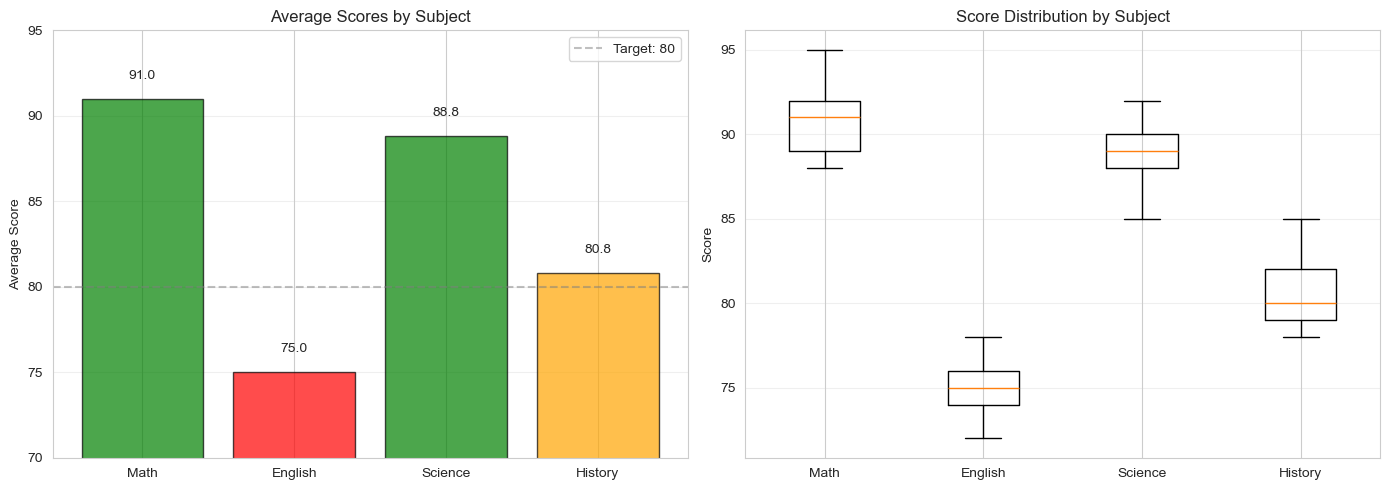

Chart saved as 'subject_comparison.png'


In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of means
subjects = ['Math', 'English', 'Science', 'History']
means_list = [math.mean(), english.mean(), science.mean(), history.mean()]
colors = ['green' if m >= 85 else 'orange' if m >= 80 else 'red' for m in means_list]

axes[0].bar(subjects, means_list, color=colors, alpha=0.7, edgecolor='black')
axes[0].axhline(y=80, color='gray', linestyle='--', alpha=0.5, label='Target: 80')
axes[0].set_ylabel('Average Score')
axes[0].set_title('Average Scores by Subject')
axes[0].set_ylim(70, 95)
for i, v in enumerate(means_list):
    axes[0].text(i, v + 1, f'{v:.1f}', ha='center', va='bottom')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='y')

# Boxplot comparison
data_box = [math, english, science, history]
axes[1].boxplot(data_box, tick_labels=subjects)
axes[1].set_ylabel('Score')
axes[1].set_title('Score Distribution by Subject')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('subject_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print("Chart saved as 'subject_comparison.png'")

---

## PROBLEM SET 5: Interpretation Challenge

**Scenario:** HR Manager compares salaries in two departments

**Sales Department:** Mean=$50K, Median=$45K, Std Dev=$15K
**Tech Department:** Mean=$60K, Median=$62K, Std Dev=$8K

**Question:** Which department has a better salary structure?

In [34]:
# Create salary data that matches the statistics
# Sales: Mean=$50K, Median=$45K, Std Dev=$15K (right-skewed)
sales_salaries = pd.Series([30, 35, 40, 45, 45, 50, 55, 60, 75, 90])

# Tech: Mean=$60K, Median=$62K, Std Dev=$8K (left-skewed) 
tech_salaries = pd.Series([45, 50, 55, 60, 62, 62, 65, 70, 75, 80])

print("Sales Salaries ($K):")
print(f"  Mean:   ${sales_salaries.mean():.0f}K")
print(f"  Median: ${sales_salaries.median():.0f}K")
print(f"  Std Dev: ${sales_salaries.std():.1f}K")

print("\nTech Salaries ($K):")
print(f"  Mean:   ${tech_salaries.mean():.0f}K")
print(f"  Median: ${tech_salaries.median():.0f}K")
print(f"  Std Dev: ${tech_salaries.std():.1f}K")

Sales Salaries ($K):
  Mean:   $52K
  Median: $48K
  Std Dev: $18.4K

Tech Salaries ($K):
  Mean:   $62K
  Median: $62K
  Std Dev: $10.8K


### Problem 5.1: Analyze Each Department

In [35]:
print("="*70)
print("SALES DEPARTMENT ANALYSIS")
print("="*70)
print(f"\nMean ($50K) > Median ($45K)")
print("This indicates RIGHT-SKEWED distribution")
print("\nWhat does this mean?")
print(f"- Most employees earn around $45K (median)")
print(f"- A few high earners (executives) pull mean up to $50K")
print(f"- High std dev ($15K) means big salary gaps")
print(f"\nInterpretation:")
print(f"  Status: ✗ INCONSISTENT PAY STRUCTURE")
print(f"  - Some employees earn much more than others")
print(f"  - Could indicate unfairness or big experience gaps")

print("\n" + "="*70)
print("TECH DEPARTMENT ANALYSIS")
print("="*70)
print(f"\nMean ($60K) < Median ($62K)")
print("This indicates LEFT-SKEWED distribution")
print("\nWhat does this mean?")
print(f"- Most employees earn around $62K (median)")
print(f"- A few low earners (juniors) pull mean down to $60K")
print(f"- Low std dev ($8K) means salaries are consistent")
print(f"\nInterpretation:")
print(f"  Status: ✓ FAIR, CONSISTENT PAY STRUCTURE")
print(f"  - Salaries cluster tightly around median")
print(f"  - Structured approach to compensation")
print(f"  - Less variability in pay")

SALES DEPARTMENT ANALYSIS

Mean ($50K) > Median ($45K)
This indicates RIGHT-SKEWED distribution

What does this mean?
- Most employees earn around $45K (median)
- A few high earners (executives) pull mean up to $50K
- High std dev ($15K) means big salary gaps

Interpretation:
  Status: ✗ INCONSISTENT PAY STRUCTURE
  - Some employees earn much more than others
  - Could indicate unfairness or big experience gaps

TECH DEPARTMENT ANALYSIS

Mean ($60K) < Median ($62K)
This indicates LEFT-SKEWED distribution

What does this mean?
- Most employees earn around $62K (median)
- A few low earners (juniors) pull mean down to $60K
- Low std dev ($8K) means salaries are consistent

Interpretation:
  Status: ✓ FAIR, CONSISTENT PAY STRUCTURE
  - Salaries cluster tightly around median
  - Structured approach to compensation
  - Less variability in pay


### Problem 5.2: Verdict

In [36]:
comparison_hr = pd.DataFrame({
    'Metric': ['Mean Salary', 'Median Salary', 'Std Dev', 'Distribution', 'Consistency'],
    'Sales': ['$50K', '$45K', '$15K', 'Right-Skewed', 'Inconsistent ✗'],
    'Tech': ['$60K', '$62K', '$8K', 'Left-Skewed', 'Consistent ✓']
})

print("\n" + "="*70)
print("COMPARISON TABLE")
print("="*70)
print(comparison_hr.to_string(index=False))

print("\n" + "="*70)
print("FINAL VERDICT: TECH DEPARTMENT IS BETTER")
print("="*70)
print("\nReasons:")
print("1. Higher average salary ($60K vs $50K) → Better for employees")
print("2. Higher median salary ($62K vs $45K) → Typical employee earns more")
print("3. Lower std dev ($8K vs $15K) → More equitable pay structure")
print("4. Structured compensation → Predictable, fair pay")
print("\nConclusion:")
print("If you're job hunting:")
print("  → Apply to Tech! Better pay + fairer structure")
print("\nIf you're an HR manager:")
print("  → Learn from Tech department's compensation model")


COMPARISON TABLE
       Metric          Sales         Tech
  Mean Salary           $50K         $60K
Median Salary           $45K         $62K
      Std Dev           $15K          $8K
 Distribution   Right-Skewed  Left-Skewed
  Consistency Inconsistent ✗ Consistent ✓

FINAL VERDICT: TECH DEPARTMENT IS BETTER

Reasons:
1. Higher average salary ($60K vs $50K) → Better for employees
2. Higher median salary ($62K vs $45K) → Typical employee earns more
3. Lower std dev ($8K vs $15K) → More equitable pay structure
4. Structured compensation → Predictable, fair pay

Conclusion:
If you're job hunting:
  → Apply to Tech! Better pay + fairer structure

If you're an HR manager:
  → Learn from Tech department's compensation model
